In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import f3dasm

2022-12-20 11:36:39.011203: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 11:36:39.190445: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-20 11:36:40.050627: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.1/lib64:/usr/local/cuda-11.1/lib64
2022-12-20 11:36:40.050689: W ten

In [76]:
dimensionality = 3
seed = 42
design = f3dasm.make_nd_continuous_design(bounds=np.tile([-10.,10.], (dimensionality,1)), dimensionality=dimensionality)
sampler = f3dasm.sampling.LatinHypercube(design=design,seed=seed)
samples = sampler.get_samples(numsamples=200)
d = samples.get_input_data()

In [3]:
def evaluate(X):
    z = 1 + (X - 1) / 4
    res = (
        np.sin(np.pi * z[0]) ** 2
        + sum((z[:-1] - 1) ** 2 * (1 + 10 *
                np.sin(np.pi * z[:-1] + 1) ** 2))
        + (z[-1] - 1) ** 2 * (1 + np.sin(2 * np.pi * z[-1]) ** 2)
    )
    return res

In [77]:
x = tf.convert_to_tensor(d)
x


<tf.Tensor: shape=(200, 3), dtype=float64, numpy=
array([[ 2.40944430e+00, -2.56322842e+00, -8.73157670e+00],
       [ 1.63746126e+00,  5.89929648e+00, -3.90753064e+00],
       [ 5.79698788e+00,  1.27036579e+00,  2.61181648e+00],
       [-7.16890177e+00, -1.28599160e+00,  8.48766536e+00],
       [-2.09756840e+00,  7.66019738e-01,  3.07845638e-01],
       [ 3.58955232e+00, -7.35003607e-01,  9.46334009e+00],
       [ 4.07915790e+00,  4.96264841e-01, -2.17192276e+00],
       [ 5.95538543e+00,  5.31354632e-02,  2.13861026e+00],
       [ 4.31170670e+00,  5.52857121e+00,  1.24741738e+00],
       [ 4.97533782e+00, -9.69794155e+00, -5.67778922e+00],
       [ 9.88967884e+00, -9.71338239e+00,  2.21957911e+00],
       [-8.43374777e+00,  1.10460026e+00,  7.09327285e+00],
       [ 8.83505876e+00, -5.56623848e+00,  3.19307573e+00],
       [ 2.15456168e+00,  7.10452187e+00, -6.66200484e-01],
       [-6.84387228e+00,  1.99402302e+00, -5.42171986e-01],
       [-2.47560104e+00, -4.46792199e+00,  6.50777

In [5]:
xx = tf.reshape(x, shape=(-1))
xx

<tf.Tensor: shape=(200,), dtype=float64, numpy=
array([-2.16415343e+00, -4.40781258e+00,  7.10165878e+00,  3.14291857e-03,
       -3.66432467e+00,  8.29246936e+00, -6.93924551e+00,  1.71865701e+00,
        9.18972158e+00, -8.99794155e+00, -9.02919274e+00,  2.54271078e+00,
       -2.08841309e+00,  3.12221078e+00, -7.14075854e+00, -2.92277552e+00,
       -6.43872280e-01,  6.71865185e+00, -5.98779618e+00,  8.92418523e+00,
       -5.60906796e+00,  9.53492096e+00, -9.72680061e+00, -2.88012843e+00,
       -2.29259553e+00,  6.41038292e-01, -2.57245898e-01,  3.21198654e+00,
       -4.50620440e-01,  6.40902898e+00, -1.76691020e+00,  7.91375209e+00,
        8.42579416e+00,  2.08074402e+00, -6.60511145e+00,  9.78971103e+00,
       -9.96254599e+00, -8.80300901e+00,  5.34894528e+00,  1.95393422e+00,
        8.56599840e+00,  4.09624473e+00,  4.90756647e-01,  5.49856505e+00,
        5.52420553e+00,  7.73867353e+00, -8.15680550e+00, -1.11127873e+00,
       -2.79944779e+00,  2.31435598e-01, -8.92108573

In [78]:
evaluate(x)

<tf.Tensor: shape=(200, 3), dtype=float64, numpy=
array([[5.80542182e+00, 6.57013993e+00, 7.62404316e+01],
       [2.68127938e+00, 3.48016990e+01, 1.52687957e+01],
       [3.36050685e+01, 1.61382923e+00, 6.82158534e+00],
       [5.13931526e+01, 1.65377439e+00, 7.20404633e+01],
       [4.39979321e+00, 5.86786239e-01, 9.47689369e-02],
       [1.28848859e+01, 5.40230302e-01, 8.95548056e+01],
       [1.66395292e+01, 2.46278793e-01, 4.71724849e+00],
       [3.54666156e+01, 2.82337744e-03, 4.57365386e+00],
       [1.85908147e+01, 3.05650996e+01, 1.55605013e+00],
       [2.47539864e+01, 9.40500703e+01, 3.22372904e+01],
       [9.78057476e+01, 9.43497974e+01, 4.92653144e+00],
       [7.11281015e+01, 1.22014174e+00, 5.03145197e+01],
       [7.80582632e+01, 3.09830108e+01, 1.01957326e+01],
       [4.64213603e+00, 5.04742310e+01, 4.43823085e-01],
       [4.68385878e+01, 3.97612782e+00, 2.93950462e-01],
       [6.12860049e+00, 1.99623269e+01, 4.23511155e+01],
       [1.37897759e-01, 1.25081751e+01

In [7]:
# x = tf.linspace(0,10,100)
x = tf.Variable(x)
type(x)

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [8]:
with tf.GradientTape() as t:
    y = tf.sin(x)

dydx = t.gradient(y, x)
dydx



<tf.Tensor: shape=(200, 1), dtype=float64, numpy=
array([[-0.55914743],
       [-0.2998891 ],
       [ 0.68333652],
       [ 0.99999506],
       [-0.86645846],
       [-0.42457075],
       [ 0.79240165],
       [-0.14732249],
       [-0.97250121],
       [-0.91028001],
       [-0.92277121],
       [-0.82596644],
       [-0.49481051],
       [-0.99981218],
       [ 0.65427465],
       [-0.9761549 ],
       [ 0.79977724],
       [ 0.90667334],
       [ 0.95668893],
       [-0.87729824],
       [ 0.78125821],
       [-0.99394039],
       [-0.9547368 ],
       [-0.96601252],
       [-0.66073626],
       [ 0.80147526],
       [ 0.96709434],
       [-0.99752337],
       [ 0.90017706],
       [ 0.99209213],
       [-0.19485917],
       [-0.05973488],
       [-0.54115713],
       [-0.48813159],
       [ 0.94862776],
       [-0.93414765],
       [-0.85885408],
       [-0.81284936],
       [ 0.59442973],
       [-0.37383269],
       [-0.65336189],
       [-0.57789274],
       [ 0.88197651],
    

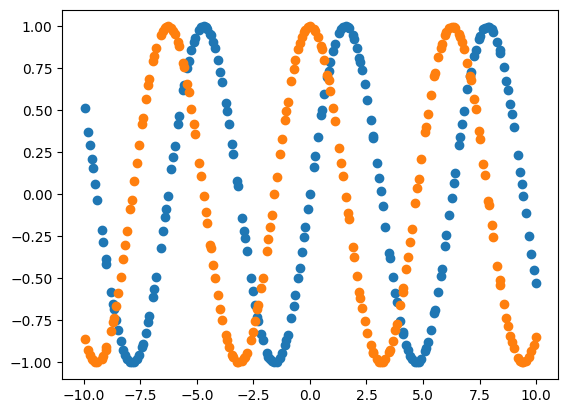

In [9]:
plt.scatter(x,y)
plt.scatter(x,dydx) 


In [10]:
dydx == tf.cos(x)

<tf.Tensor: shape=(200, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ 

In [11]:
X = tf.ones(3) * 0.3

In [12]:
z = 1 + (X - 1) / 4

In [13]:
(
        np.sin(np.pi * z[0]) ** 2
        + sum((z[:-1] - 1) ** 2 * (1 + 10 *
                np.sin(np.pi * z[:-1] + 1) ** 2))
        + (z[-1] - 1) ** 2 * (1 + np.sin(2 * np.pi * z[-1]) ** 2)
    )

<tf.Tensor: shape=(), dtype=float32, numpy=0.50518084>

In [14]:
X = tf.linspace(0,10,100, axis=0)
X2 = tf.reshape(X, shape=(-1,len(X)))
X2

<tf.Tensor: shape=(1, 100), dtype=float64, numpy=
array([[ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
         0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
         1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
         1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
         2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
         2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
         3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
         3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
         4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
         4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
         5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
         5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
         6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
 

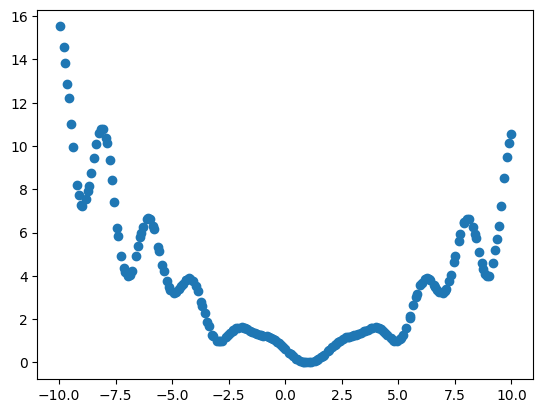

In [15]:
plt.scatter(xx, evaluate(x1))

In [16]:
net = tf.keras.layers.Flatten()

In [17]:
x

<tf.Variable 'Variable:0' shape=(200, 1) dtype=float64, numpy=
array([[-2.16415343e+00],
       [-4.40781258e+00],
       [ 7.10165878e+00],
       [ 3.14291857e-03],
       [-3.66432467e+00],
       [ 8.29246936e+00],
       [-6.93924551e+00],
       [ 1.71865701e+00],
       [ 9.18972158e+00],
       [-8.99794155e+00],
       [-9.02919274e+00],
       [ 2.54271078e+00],
       [-2.08841309e+00],
       [ 3.12221078e+00],
       [-7.14075854e+00],
       [-2.92277552e+00],
       [-6.43872280e-01],
       [ 6.71865185e+00],
       [-5.98779618e+00],
       [ 8.92418523e+00],
       [-5.60906796e+00],
       [ 9.53492096e+00],
       [-9.72680061e+00],
       [-2.88012843e+00],
       [-2.29259553e+00],
       [ 6.41038292e-01],
       [-2.57245898e-01],
       [ 3.21198654e+00],
       [-4.50620440e-01],
       [ 6.40902898e+00],
       [-1.76691020e+00],
       [ 7.91375209e+00],
       [ 8.42579416e+00],
       [ 2.08074402e+00],
       [-6.60511145e+00],
       [ 9.78971103e+00],
 

In [22]:
def evaluate(X):
    return X*X

In [81]:
def evaluate2(X, *args, **kwargs):
    # d = X.shape[0]
    # res = np.sum(X**2)
    # res = tf.reduce_sum(X*X, axis=0, keepdims=True)
    res = 0.5 * tf.reduce_sum(X**4 - 16 * X**2 + 5 * X, axis=1, keepdims=True)
    return res

In [103]:
class MLArchitecture(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.model = tf.keras.models.Sequential()

    def forward(self, X):
        assert hasattr(self, 'model'), 'Neural network is defined'
        return self.model(X)

    def call(self, X, *args, **kwargs): # Shape: (samples, dim)
        return self.forward(X, *args)

    def loss(self, Y_model, Y_labels): #Y_hat = model output, Y = labels
        return self.loss_function(Y_model, Y_labels)

    def loss_function(Y_model, Y_labels):
        raise NotImplementedError

In [104]:
from functools import partial

class SimpleModel(MLArchitecture):
    def __init__(self, dim, loss_function):
        super().__init__()

        # Add only an input layer, therefore output = input
        self.model.add = (tf.keras.layers.InputLayer(input_shape=(dim,)))

        # Loss function is a benchmark function
        self.loss_function = loss_function

        # We don't have labels for benchmark function loss
        self.loss = partial(self.loss, Y_labels=None)

In [109]:
m = SimpleModel(3, evaluate2)
m.loss(m(x))
m.model.get_weights()

[]

In [91]:
evaluate3 = partial(evaluate2, Y=0.0)

In [92]:
evaluate3(x)

<tf.Tensor: shape=(200, 1), dtype=float64, numpy=
array([[ 2.21359519e+03],
       [ 3.12800691e+02],
       [ 2.77093611e+02],
       [ 2.91629253e+03],
       [-3.33543049e+01],
       [ 3.30014301e+03],
       [-1.72221926e+01],
       [ 3.39422655e+02],
       [ 2.63156021e+02],
       [ 4.01437747e+03],
       [ 7.67539269e+03],
       [ 2.81423144e+03],
       [ 2.64075488e+03],
       [ 8.61697885e+02],
       [ 6.82525271e+02],
       [ 5.66209894e+02],
       [-5.58270934e+01],
       [ 1.52918648e+03],
       [ 4.01896878e+03],
       [ 6.24329230e+03],
       [-6.08534437e+01],
       [ 2.21633937e+03],
       [ 3.67653942e+03],
       [ 3.31431184e+03],
       [ 2.44521706e+03],
       [ 4.22824088e+03],
       [ 1.10136744e+02],
       [ 8.97554873e+02],
       [ 1.81878444e+03],
       [ 2.54749546e+03],
       [ 1.14439831e+03],
       [ 8.25088734e+02],
       [ 3.10054893e+03],
       [ 2.88961507e+03],
       [ 3.70800355e+03],
       [ 6.40228129e+02],
       [ 4.005

In [89]:
evaluate2(x, X)

<tf.Tensor: shape=(200, 1), dtype=float64, numpy=
array([[ 2.21359519e+03],
       [ 3.12800691e+02],
       [ 2.77093611e+02],
       [ 2.91629253e+03],
       [-3.33543049e+01],
       [ 3.30014301e+03],
       [-1.72221926e+01],
       [ 3.39422655e+02],
       [ 2.63156021e+02],
       [ 4.01437747e+03],
       [ 7.67539269e+03],
       [ 2.81423144e+03],
       [ 2.64075488e+03],
       [ 8.61697885e+02],
       [ 6.82525271e+02],
       [ 5.66209894e+02],
       [-5.58270934e+01],
       [ 1.52918648e+03],
       [ 4.01896878e+03],
       [ 6.24329230e+03],
       [-6.08534437e+01],
       [ 2.21633937e+03],
       [ 3.67653942e+03],
       [ 3.31431184e+03],
       [ 2.44521706e+03],
       [ 4.22824088e+03],
       [ 1.10136744e+02],
       [ 8.97554873e+02],
       [ 1.81878444e+03],
       [ 2.54749546e+03],
       [ 1.14439831e+03],
       [ 8.25088734e+02],
       [ 3.10054893e+03],
       [ 2.88961507e+03],
       [ 3.70800355e+03],
       [ 6.40228129e+02],
       [ 4.005

In [95]:
m = SimpleModel2(dim=3, loss_function=evaluate2)

In [96]:
m(x)

<tf.Tensor: shape=(200, 3), dtype=float32, numpy=
array([[ 2.40944433e+00, -2.56322837e+00, -8.73157692e+00],
       [ 1.63746130e+00,  5.89929628e+00, -3.90753055e+00],
       [ 5.79698801e+00,  1.27036583e+00,  2.61181641e+00],
       [-7.16890192e+00, -1.28599155e+00,  8.48766518e+00],
       [-2.09756851e+00,  7.66019762e-01,  3.07845652e-01],
       [ 3.58955240e+00, -7.35003591e-01,  9.46333981e+00],
       [ 4.07915783e+00,  4.96264845e-01, -2.17192268e+00],
       [ 5.95538521e+00,  5.31354621e-02,  2.13861036e+00],
       [ 4.31170654e+00,  5.52857113e+00,  1.24741733e+00],
       [ 4.97533798e+00, -9.69794178e+00, -5.67778921e+00],
       [ 9.88967896e+00, -9.71338272e+00,  2.21957922e+00],
       [-8.43374825e+00,  1.10460031e+00,  7.09327269e+00],
       [ 8.83505917e+00, -5.56623840e+00,  3.19307566e+00],
       [ 2.15456176e+00,  7.10452175e+00, -6.66200459e-01],
       [-6.84387207e+00,  1.99402297e+00, -5.42172015e-01],
       [-2.47560096e+00, -4.46792221e+00,  6.50777

In [97]:
m.loss(m(x))

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[ 2.21359546e+03],
       [ 3.12800598e+02],
       [ 2.77093689e+02],
       [ 2.91629248e+03],
       [-3.33543053e+01],
       [ 3.30014258e+03],
       [-1.72221985e+01],
       [ 3.39422577e+02],
       [ 2.63156006e+02],
       [ 4.01437793e+03],
       [ 7.67539355e+03],
       [ 2.81423193e+03],
       [ 2.64075537e+03],
       [ 8.61697754e+02],
       [ 6.82525146e+02],
       [ 5.66209839e+02],
       [-5.58270988e+01],
       [ 1.52918640e+03],
       [ 4.01896948e+03],
       [ 6.24329297e+03],
       [-6.08534470e+01],
       [ 2.21634009e+03],
       [ 3.67653906e+03],
       [ 3.31431201e+03],
       [ 2.44521704e+03],
       [ 4.22824023e+03],
       [ 1.10136726e+02],
       [ 8.97554810e+02],
       [ 1.81878406e+03],
       [ 2.54749585e+03],
       [ 1.14439844e+03],
       [ 8.25088684e+02],
       [ 3.10054834e+03],
       [ 2.88961523e+03],
       [ 3.70800317e+03],
       [ 6.40228149e+02],
       [ 4.005

In [98]:
evaluate2(x)

<tf.Tensor: shape=(200, 1), dtype=float64, numpy=
array([[ 2.21359519e+03],
       [ 3.12800691e+02],
       [ 2.77093611e+02],
       [ 2.91629253e+03],
       [-3.33543049e+01],
       [ 3.30014301e+03],
       [-1.72221926e+01],
       [ 3.39422655e+02],
       [ 2.63156021e+02],
       [ 4.01437747e+03],
       [ 7.67539269e+03],
       [ 2.81423144e+03],
       [ 2.64075488e+03],
       [ 8.61697885e+02],
       [ 6.82525271e+02],
       [ 5.66209894e+02],
       [-5.58270934e+01],
       [ 1.52918648e+03],
       [ 4.01896878e+03],
       [ 6.24329230e+03],
       [-6.08534437e+01],
       [ 2.21633937e+03],
       [ 3.67653942e+03],
       [ 3.31431184e+03],
       [ 2.44521706e+03],
       [ 4.22824088e+03],
       [ 1.10136744e+02],
       [ 8.97554873e+02],
       [ 1.81878444e+03],
       [ 2.54749546e+03],
       [ 1.14439831e+03],
       [ 8.25088734e+02],
       [ 3.10054893e+03],
       [ 2.88961507e+03],
       [ 3.70800355e+03],
       [ 6.40228129e+02],
       [ 4.005

In [ ]:
with tf.GradientTape() as t:
    y = m(x, evaluate2)

dydmx = t.gradient(y, x)
dydmx.shape, x.shape, xx.shape, y.shape

In [ ]:
from linreg import LinearRegression
mm = LinearRegression(lr=0.02)

In [ ]:
yy = mm(x)
mm.net.weights

In [ ]:
xx = tf.transpose(x)

plt.scatter(x,y)
plt.scatter(x,dydmx) 

In [ ]:
opt = tf.keras.optimizers.SGD(1e-4)


In [ ]:
m.trainable_variables